## Name: Tay Yikoon Lomibao @ Tay Yi Koon
## Admission No.: 2309389
## Class: DAAA/1B/01

# Import Modules and Dataset

In [44]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV, learning_curve, ShuffleSplit
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, roc_curve, auc, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from warnings import filterwarnings
os.chdir("C:\\Users\\obsid\\OneDrive\\Documents\\CA1-Dataset")

In [45]:
df = pd.read_csv("CA1-Classification-Dataset.csv") # Load in dataset
print(df.shape)
df.head()

(3276, 10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Clarity,Quality
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Explanation of Features

1. ph: ph is a scale from 0 to 14 defining the acidity or alkalinity of water. The lower the ph, the more acidic while the higher the ph, the more alkaline the water will be. According to the World Health Organisation (WHO), the range of ph levels to which water is drinkable is 6.5 - 8.5.


2. Hardness: Hardness concerns the amount of calcium and magnesium in water, where water described as "hard" contains high amounts of calcium and magnesium. In terms of health, hard water is not a health risk, but can positively contribute to one's mineral intake. Usually, the hardness of drinkable water does not exceed 120 mg/L.


3. Solids: Solids, or Total Dissolved Solids (TDS), concerns the amount of solids that are dissolved in a body of water. They are usually minerals such as calcium, magnesium and sulfate. According to WHO, the accepted amount of solids in water should not exceed 500 mg/L.


4. Chloramines: Chloramines are disinfectants that kill germs that can cause disease such as salmonella within water which makes it safe to drink. Usually, up to 4 mg/L of chloramines in water is safe to drink. Too much chloramines may cause and aggravate respiratory problems.

5. Sulfate: Sulfates are naturally occurring substances present in minerals, rocks and soil. They are also present in ambient air, groundwater, plants and food. Taking too much sulfates may produce a laxative effect, so the accepted amount of sulfates in water should not exceed 500 mg/L to avoid the laxative effect.

6. Conductivity: Conductivity refers to the ability of water to conduct an electrical current through the ions dissolved in it. These ions include calcium, magnesium and sulfate, therefore it can also measure the amount of dissolved ions in the water. According to the Environmental Protection Agency (EPA), less than 1000 mcg/cm of conductivity is recommended for drinking water.

7. Organic_carbon: Organic carbon, or Total Organic Carbon (TOC), is a measure of the amount of carbon in organic compounds in pure water. Organic carbon may act as a source of energy to micro-organisms like bacteria, which may cause illness such as diarrhea. According to WHO, a guideline is that organic carbon in water does not exceed 10 mg/L.

8. Trihalomethanes: Trihalomethanes are volatile and potentially dangerous chemicals formed from water disinfectants such as chlorine. A common trihalomethane is chloroform. Negative health effects include fatigue, headache and mild chest pain. The EPA recommends only at most 80 ppm of trihalomethanes in drinking water.

9. Clarity: Clarity, or turbidity, is a measure of how cloudy a body of water is, where low turbidity means clear and translucent water. High turbidity will mean the water may contain viruses and bacteria that are attached to the suspended solids in the water which can cause illness. According to WHO, turbidity of drinking water should not exceed 5 NTU.

10. Quality: This is the target variable with values either '1' or '0' which may be explained by the other features. I am not sure which one indicates drinkable and non-drinkable quality water.

# Prediction Task

I defined it by looking at the background information, which says the data is collected by an environmental company that wants to build a machine learning model to predict water quality based on water properties for the sake of quality control. This to me meant that since an environmental company is doing this, it would have to be in the interest of the people that the quality of water should be concerning. Therefore, quality of water can only be classified by people to simply be either safe and drinkable or non-drinkable. The meaning of the output variable where it could either be '1' or '0'.

# Data Exploration

In [20]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Clarity,Quality
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Looking at the mean of each feature, ph, Sulfate, Conductivity, Trihalomethanes and Clarity are within drinkable water range, whereas Hardness, Chloramines, Organic_carbon are not within this range. However, Solids has a mean that I cannot comfortably attach a unit to and judge whether or not they are within drinkable water range.

In [21]:
df[df['Quality'] == 1].describe() # Print values with drinkable water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Clarity,Quality
count,1101.000000,1278.000000,1278.000000,1278.000000,985.000000,1278.000000,1278.000000,1223.000000,1278.000000,1278.0
mean,7.073783,195.800744,22383.991018,7.169338,332.566990,425.383800,14.160893,66.539684,3.968328,1.0
std,1.448048,35.547041,9101.010208,1.702988,47.692818,82.048446,3.263907,16.327419,0.780842,0.0
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207,1.0
25%,6.179312,174.330531,15668.985038,6.094134,300.763772,360.939023,12.033897,56.014249,3.430909,1.0
50%,7.036752,196.632907,21199.386615,7.215163,331.838167,420.712729,14.162809,66.678214,3.958576,1.0
75%,7.933068,218.003420,27973.236447,8.199261,365.941346,484.155911,16.356245,77.380975,4.509569,1.0
max,13.175402,323.124000,56488.672410,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0


Only ph, Sulfate, Conductivity, Trihalomethanes and Clarity are within drinkable range if we take the mean.

In [22]:
df[df['Quality'] == 0].describe() # Print values with non-drinkable water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Clarity,Quality
count,1684.000000,1998.000000,1998.000000,1998.000000,1510.000000,1998.000000,1998.000000,1891.000000,1998.000000,1998.0
mean,7.085378,196.733292,21777.490788,7.092175,334.564290,426.730454,14.364335,66.303555,3.965800,0.0
std,1.683499,31.057540,8543.068788,1.501045,36.745549,80.047317,3.334554,16.079320,0.780282,0.0
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000,0.0
25%,6.037723,177.823265,15663.057382,6.155640,311.264006,368.498530,12.101057,55.706530,3.444062,0.0
50%,7.035456,197.123423,20809.618280,7.090334,333.389426,422.229331,14.293508,66.542198,3.948076,0.0
75%,8.155510,216.120687,27006.249013,8.066462,356.853897,480.677198,16.649485,77.277704,4.496106,0.0
max,14.000000,304.235912,61227.196010,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000,0.0


Only ph, Sulfate, Conductivity, Trihalomethanes and Clarity are within drinkable range, which is similar to Quality = 1 instances.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Clarity          3276 non-null   float64
 9   Quality          3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


<Axes: xlabel='Quality', ylabel='count'>

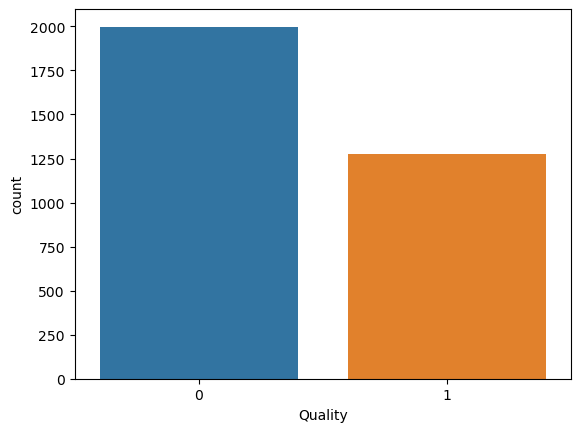

In [24]:
sns.countplot(data=df, x='Quality') # Visualise the amount of class 0 and class 1

There seems to be an imbalance in values with 0 having way more instances than 1, this is something to be considered in the modelling process since having one class with more instances than the other class will lead to bias in the model.

<Axes: >

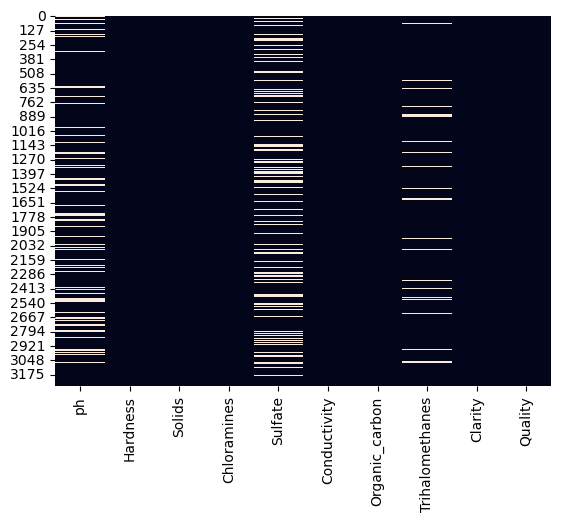

In [25]:
sns.heatmap(df.isnull(), cbar=False) # Visualise amount of missing data

There seems to be a lot of missing data, let's look into how many exactly

In [26]:
df.isna().sum() # Print out count of missing values from each feature

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Clarity              0
Quality              0
dtype: int64

We can see that in total there's 1434 missing values, that's a lot of precious data which means dropping missing values is not viable as hundreds of rows of data will be lost

C:\Users\obsid\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


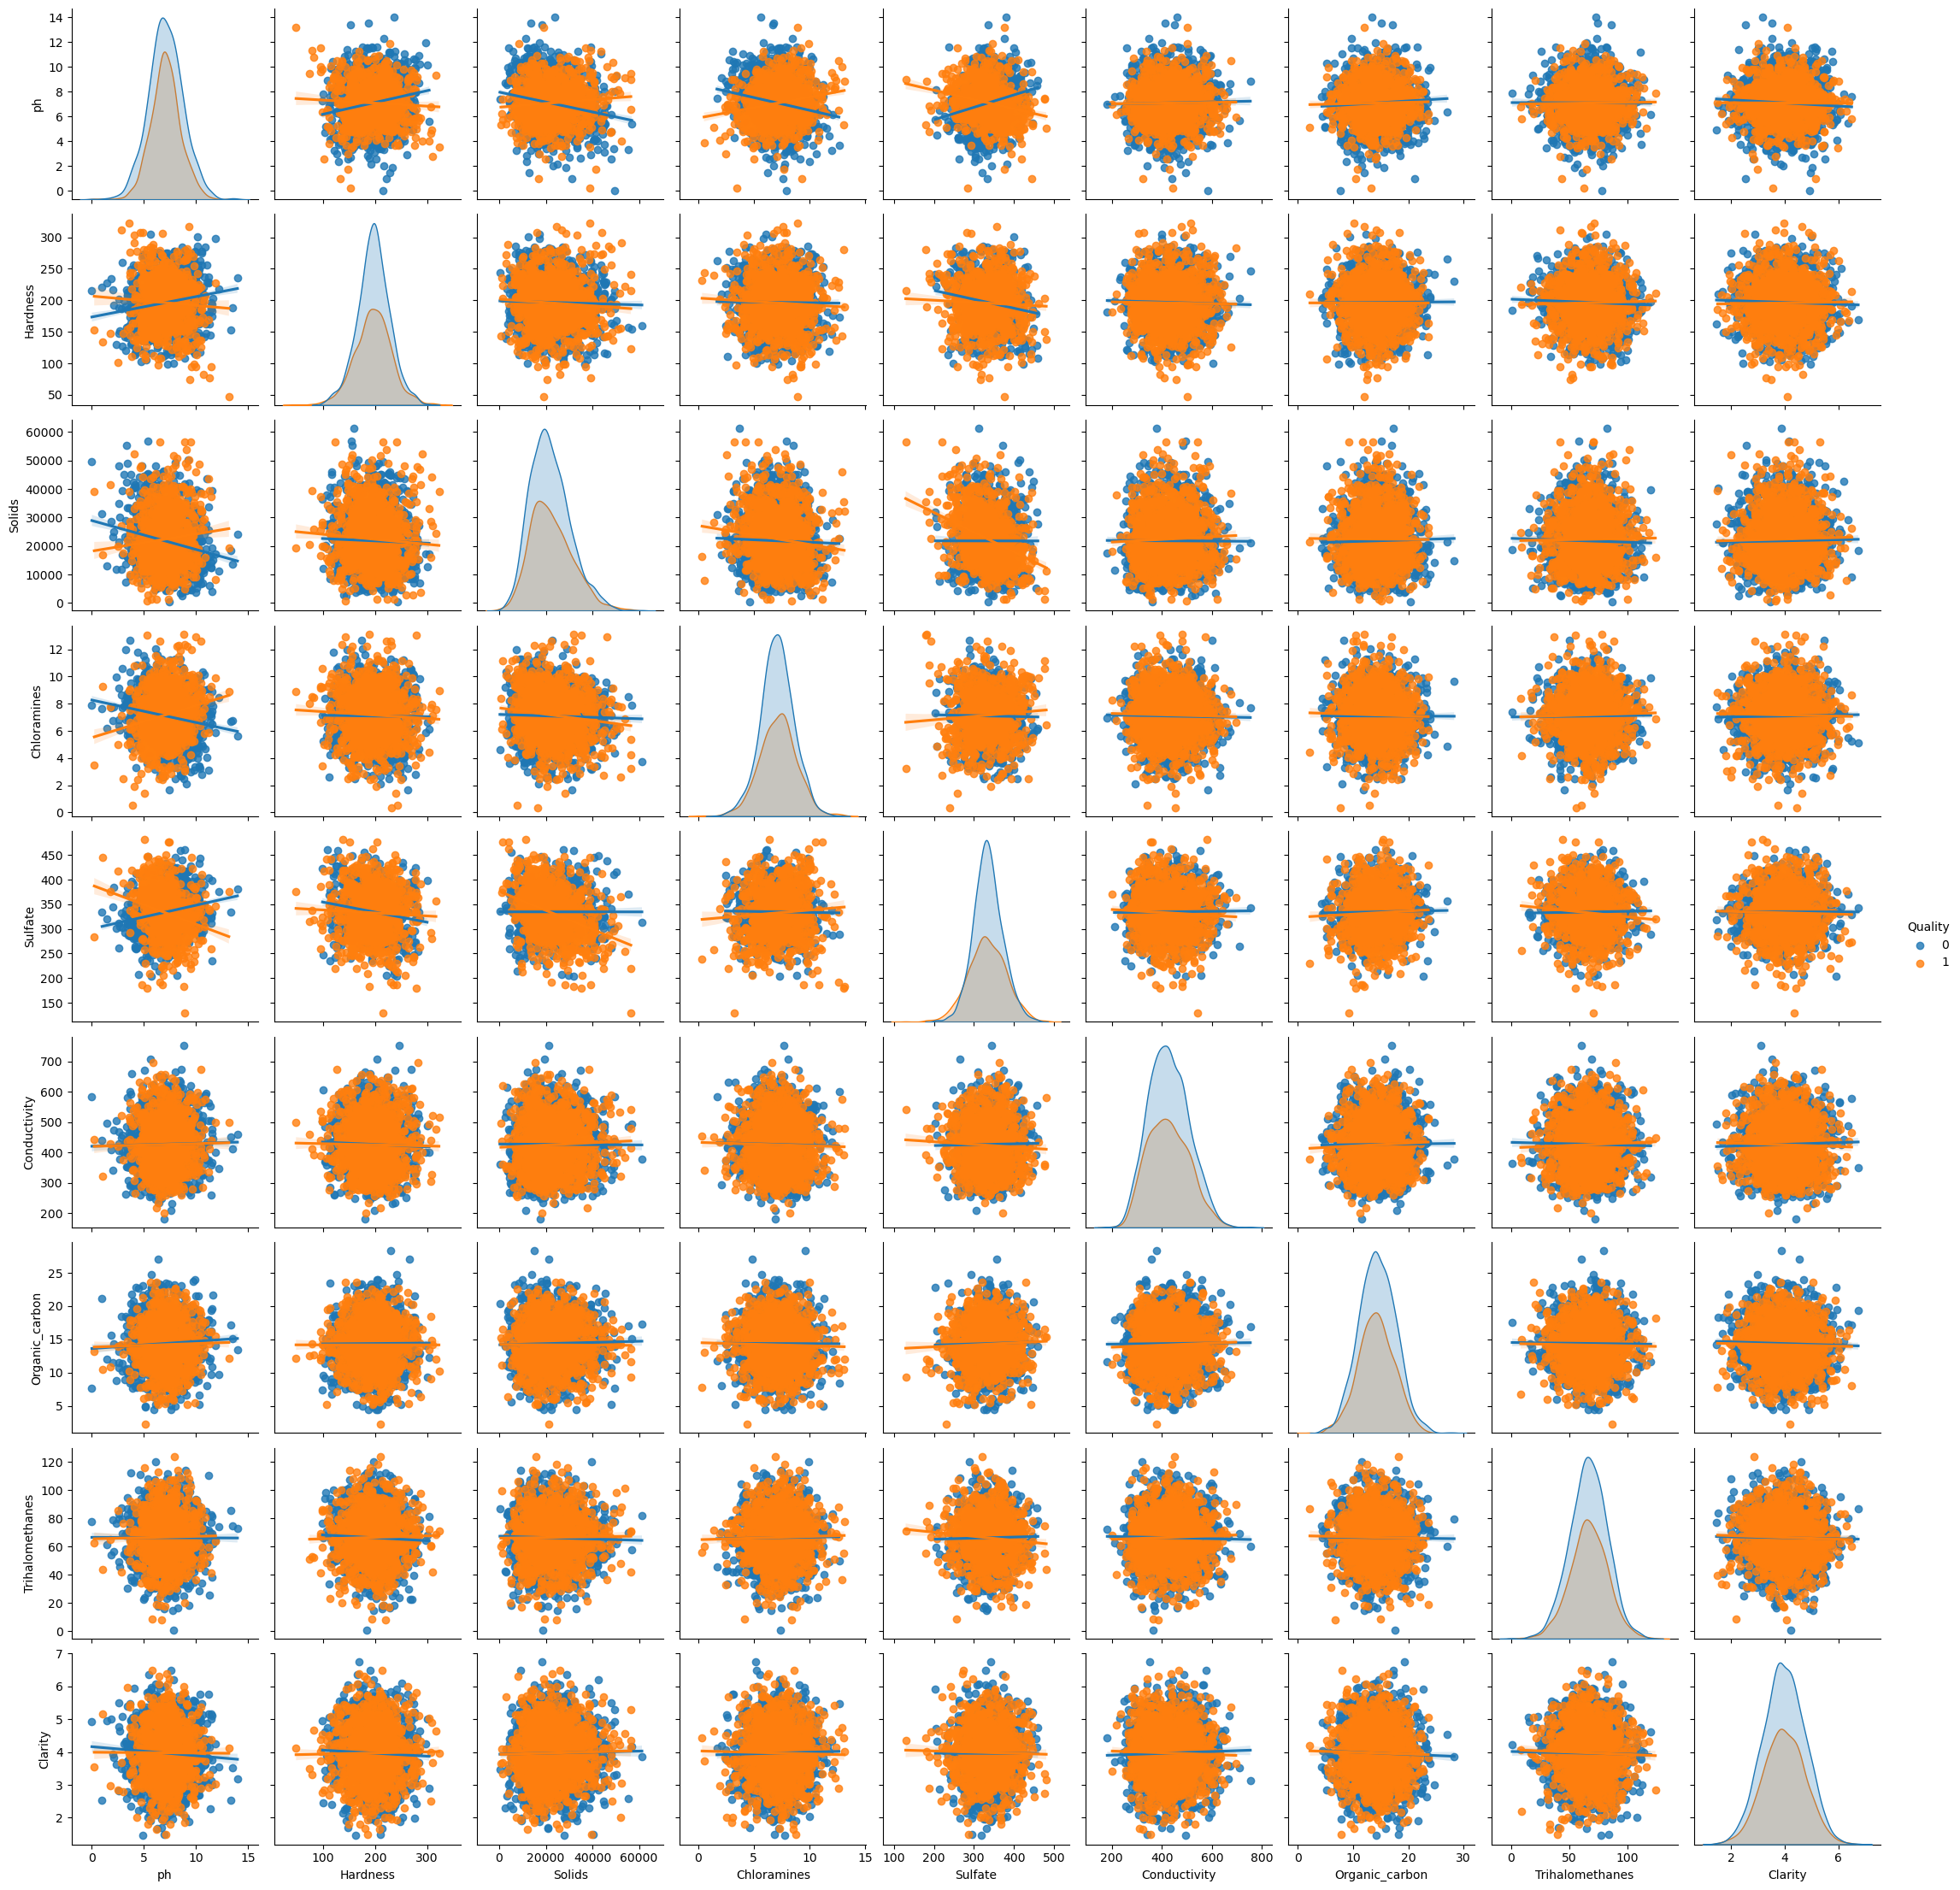

In [27]:
sns.pairplot(df, hue='Quality', kind='reg') # Plot scatterplot of each feature against the other 

In [28]:
df.corr() # Print correlation values for all features

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Clarity,Quality
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Clarity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Quality,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


<Axes: >

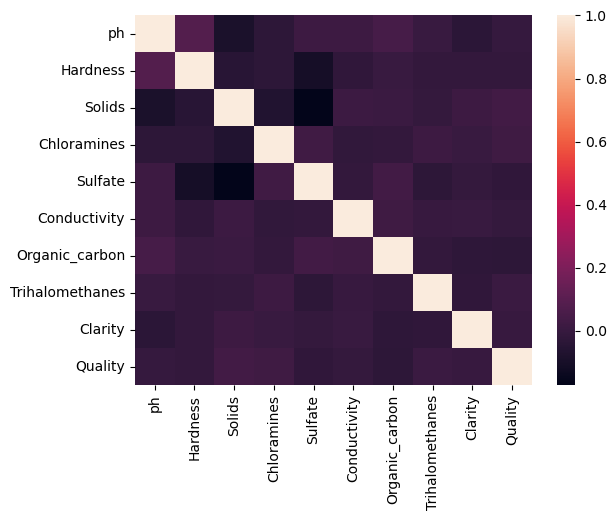

In [29]:
sns.heatmap(df.corr()) # Visualise correlation using heatmap

Using the scatterplots and heatmap of each feature compared to every other feature, there seems to be little to no correlation amongst the features. The curve graphs show that generally, all of the features are normally distributed as they have a symmetrical bell-shaped curve.

<Axes: xlabel='ph'>

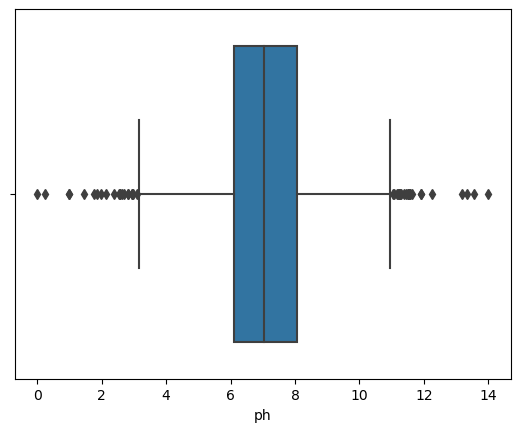

In [30]:
sns.boxplot(data=df, x=df["ph"]) # Visualising outliers and distribution in each feature

<Axes: xlabel='Hardness'>

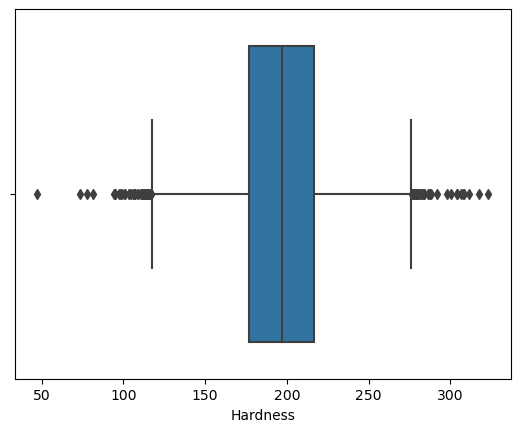

In [31]:
sns.boxplot(data=df, x=df["Hardness"])

<Axes: xlabel='Solids'>

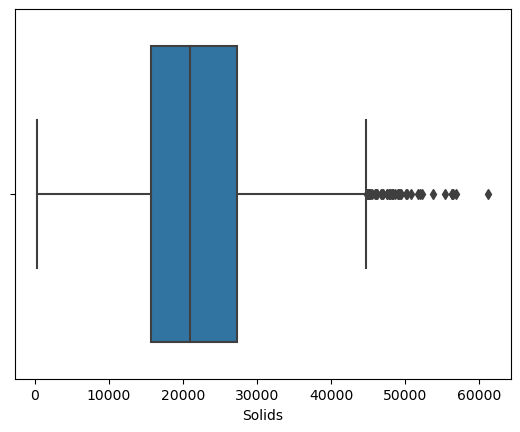

In [32]:
sns.boxplot(data=df, x=df["Solids"])

<Axes: xlabel='Chloramines'>

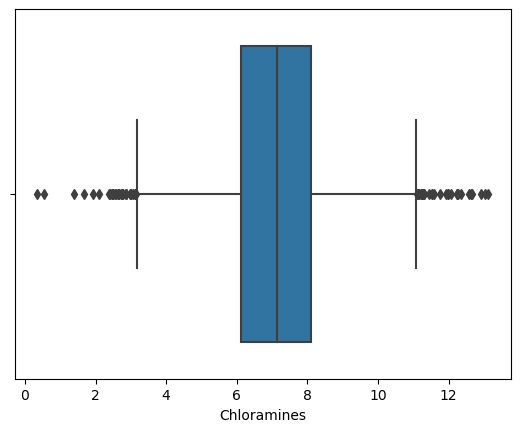

In [33]:
sns.boxplot(data=df, x=df["Chloramines"])

<Axes: xlabel='Sulfate'>

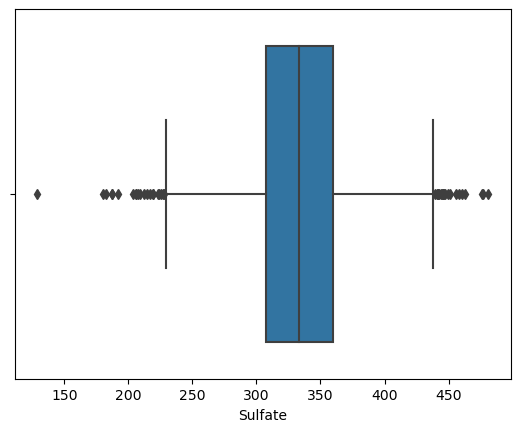

In [34]:
sns.boxplot(data=df, x=df["Sulfate"])

<Axes: xlabel='Conductivity'>

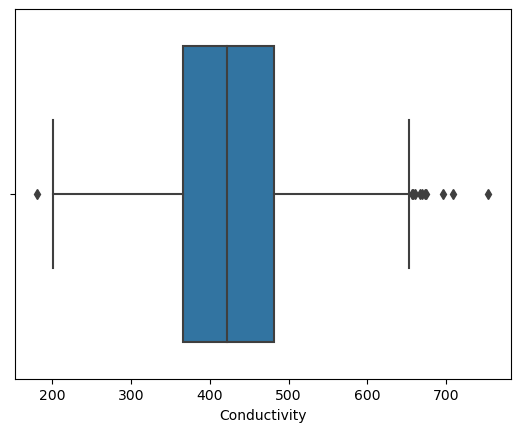

In [35]:
sns.boxplot(data=df, x=df["Conductivity"])

<Axes: xlabel='Organic_carbon'>

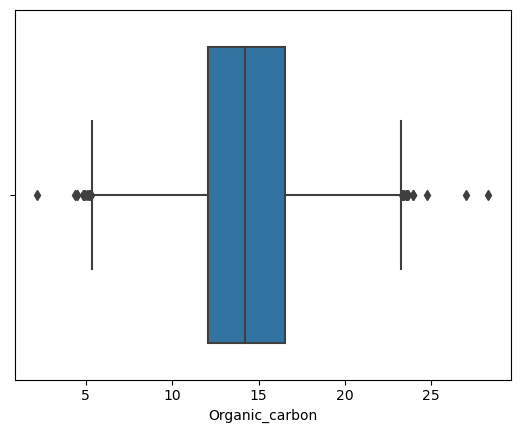

In [36]:
sns.boxplot(data=df, x=df["Organic_carbon"])

<Axes: xlabel='Trihalomethanes'>

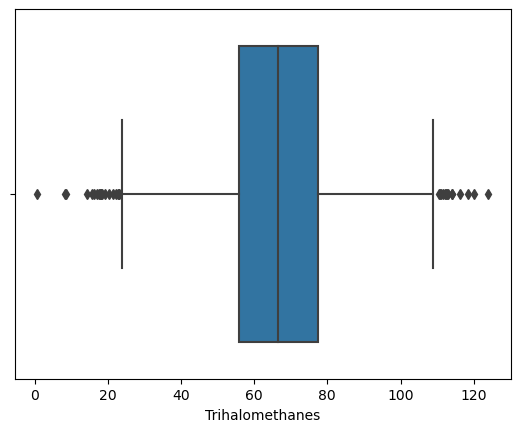

In [37]:
sns.boxplot(data=df, x=df["Trihalomethanes"])

<Axes: xlabel='Clarity'>

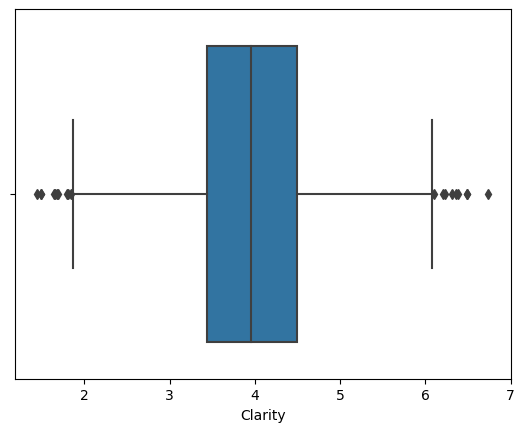

In [38]:
sns.boxplot(data=df, x=df["Clarity"])

Judging by the amount of outliers in each boxplot, it would mean that a lot of data would be lost if they were to be removed therefore filtering out outliers are not viable either. The whiskers show that none of the features have a high level of skewness.

# Preprocessing Data

In [46]:
X = df.drop(columns='Quality') # Performing train test split
y = df['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Creating validation set based on training set 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

imputer = SimpleImputer(strategy = 'median') # Imputing missing values for training and testing data using SimpleImputer

X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)
X_val = imputer.fit_transform(X_val)

scaler = StandardScaler() # Scaling the data so that one value with a high scale does not overpower the learning algorithm
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_val_scaled = scaler.fit_transform(X_val)

I imputed missing values using median because all of the features with missing values are generally normally distributed. I realised that if I were to impute values before performing train test split, it would mean that that the testing data-to-be will be influenced by the training data since the imputer takes values from the entire dataset, including training data. Therefore, I think it would be better to impute both training and testing sets separately so to avoid data leakage. I also scaled the data as it will make the mean 0 and the standard deviation 1 so it makes it easier for the model to work with.

# Model Evaluation Quality

I will be evaluating the quality of my model by using:
1. Accuracy: I will primarily be using this as it is hard to judge which class is important because I cannot assume which class contains drinkable water and which class contains non-drinkable water. Therefore, a score that gives the percentage of all correctly predicted values is ideal.
2. f1-score: Since I do not know if I want to prioritise precision or recall, a harmonic mean of both is a safe way of scoring the model.
3. ROC AUC: Area Under the Receiver Operating Characteristic Curve plots the true positive rate against the false positive rate.

The ROC curve shows me that the model does slightly better than a model that randomly predicts regardless of the input as highlighted by the straight diagonal dotted line. The AUC score of 0.53 tells me that the model is able to discriminate class 1 and class 0 instances which is interesting.

# Dummy Baseline Model

Under the 'Quality' column, there's significantly more values of '0' than that of '1'. This leads to an imbalanced dataset that influences a bias in the model, which negatively impacts performance. Therefore, a method to balance this dataset is oversampling. Oversampling generates synthetic data points in the minority class, thereby giving more representation for the minority class and giving the model more data to be trained by. A module which does oversampling is SMOTE, which is what I'll be using for this dataset.

In [47]:
smt = SMOTE() # To balance the training data since there is more class 0 than class 1
X_train_scaled, y_train = smt.fit_resample(X_train_scaled, y_train)

## Distribution of Quality With SMOTE

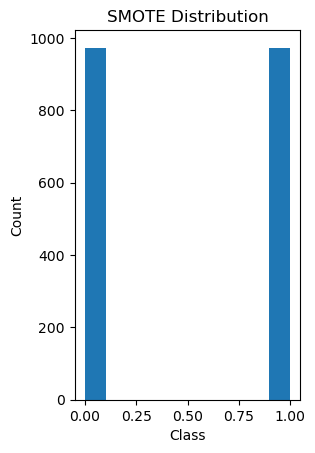

In [48]:
plt.subplot(1, 2, 2) # Plot the amount of class 0 and class 1
plt.hist(y_train, bins=10)
plt.title("SMOTE Distribution")
plt.xlabel("Class")
plt.ylabel("Count")

plt.show()

Looking at the count of class 0 and class 1, SMOTE has successfully generated synthetic samples for class 1 and now the count of class 0 is equal to the count of class 1.

              precision    recall  f1-score   support

           0       0.62      0.51      0.56       600
           1       0.40      0.51      0.45       383

    accuracy                           0.51       983
   macro avg       0.51      0.51      0.50       983
weighted avg       0.53      0.51      0.51       983



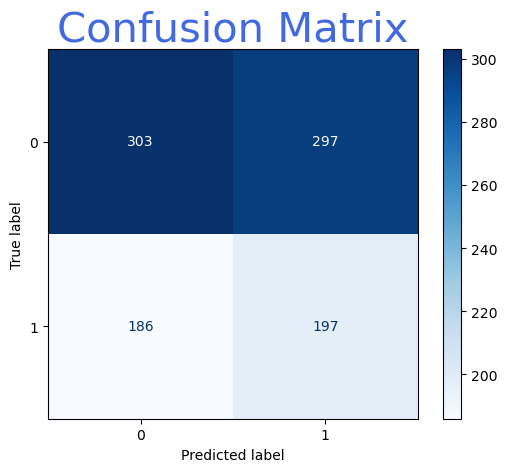

In [51]:
DC_baseline = DummyClassifier(strategy='stratified', random_state=42) # Using dummy classifier as my baseline model
DC_baseline.fit(X_train_scaled, y_train)

y_pred_baseline = DC_baseline.predict(X_test_scaled) # Predicting using test set

cm = confusion_matrix(y_test, y_pred_baseline) # Print confusion matrix using test set

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix'
         ,fontsize = 30
         ,color = 'royalblue')

print(classification_report(y_test, y_pred_baseline)) # Print precision, recall, f1-score

The model has an accuracy of 0.51, with f1-score for class 0 being 0.56 while f1-score for class 1 being 0.45. The confusion matrix shows that there are more true negatives predicted than false negatives, but there are more false positives predicted than true positives. Overall, this model did not perform well as class 1 predictions did not do well.

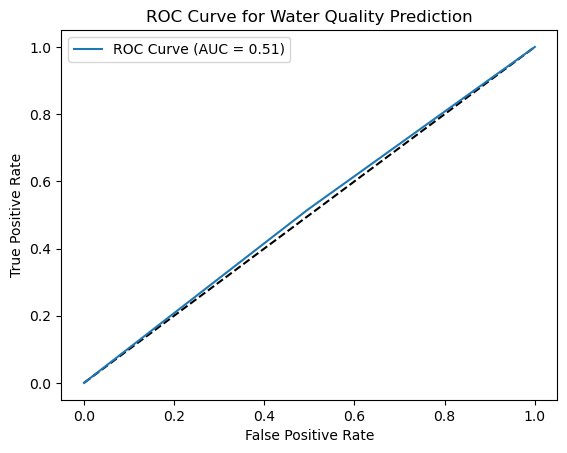

In [53]:
y_scores = DC_baseline.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores) # Print the ROC curve with AUC score

roc_auc = auc(fpr,tpr)
plt.plot([0, 1], [0, 1], 'k--')
 # Plot curve using false positive rate and true positive rate and show AUC score
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve for Water Quality Prediction')
plt.show()

This ROC curve shows that this model performs slightly better than a model that randomly predicts regardless of the input. It also shows that by its AUC score of 0.51, it discriminates class 0 and class 1 instances somewhat.

# Regularisation

In [101]:
alphas = [0.01, 0.1, 0.4, 0.5, 0.6, 0.8, 1] # List of alphas to pick which is best

lasso_cv = LassoCV(alphas = alphas, cv=5, random_state=42) # Perform Lasso Regularisation
lasso_cv.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_cv.predict(X_val_scaled)

print(f"Lasso CV - Best Alpha: {lasso_cv.alpha_}")

Lasso CV - Best Alpha: 1.0


While regularisation is used more for regression models to increase loss function, it can also be used for classification which helps the model generalise better which can increase its accuracy.

# KFold Cross Validation

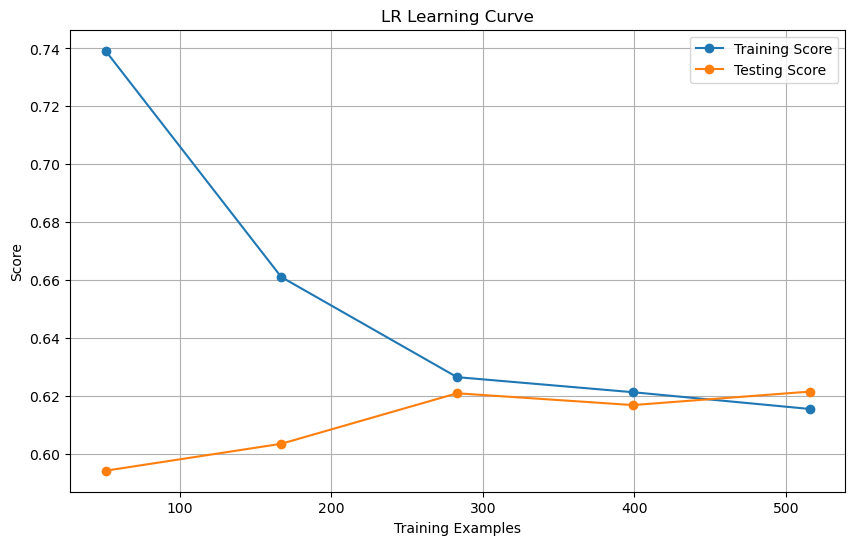

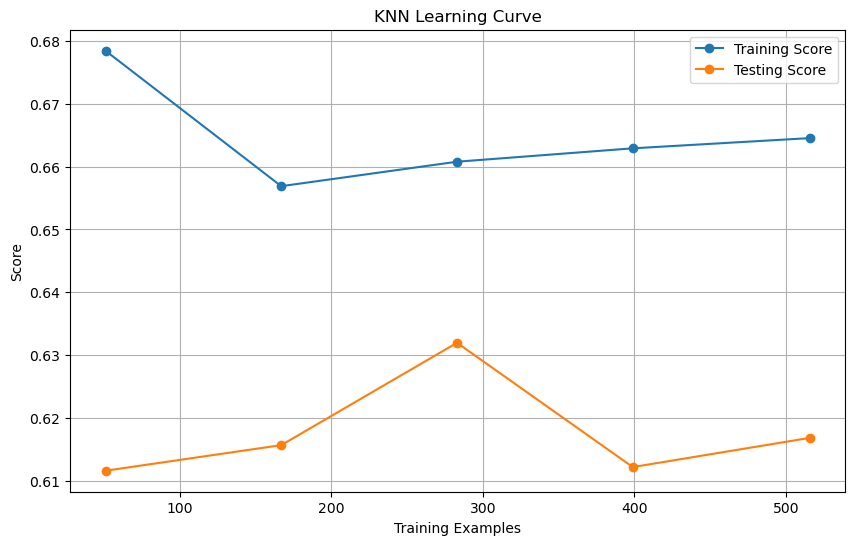

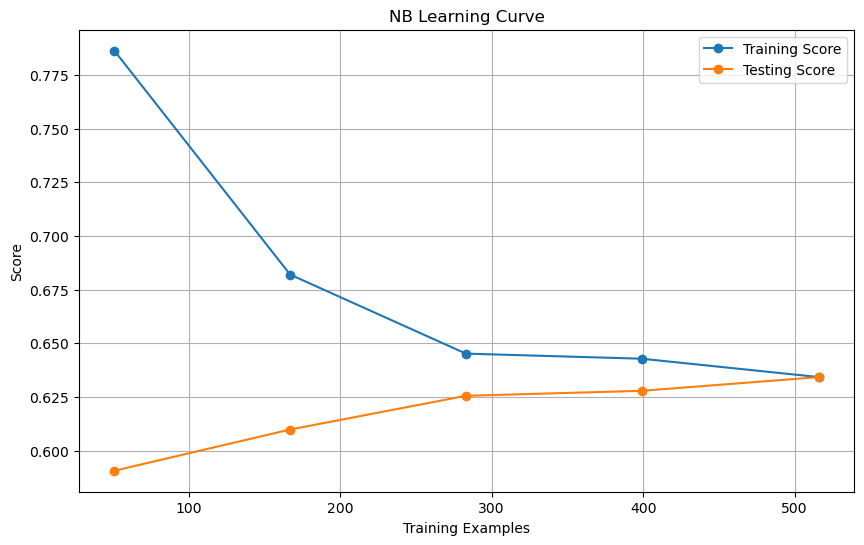

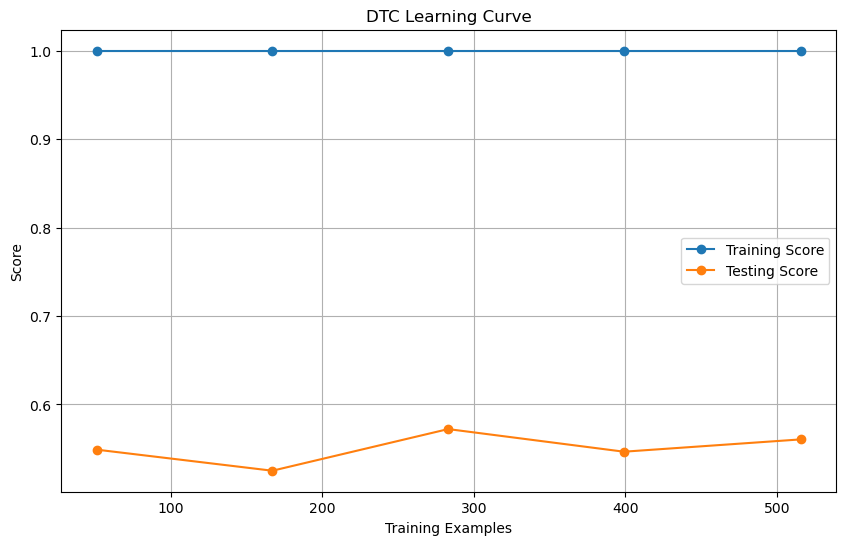

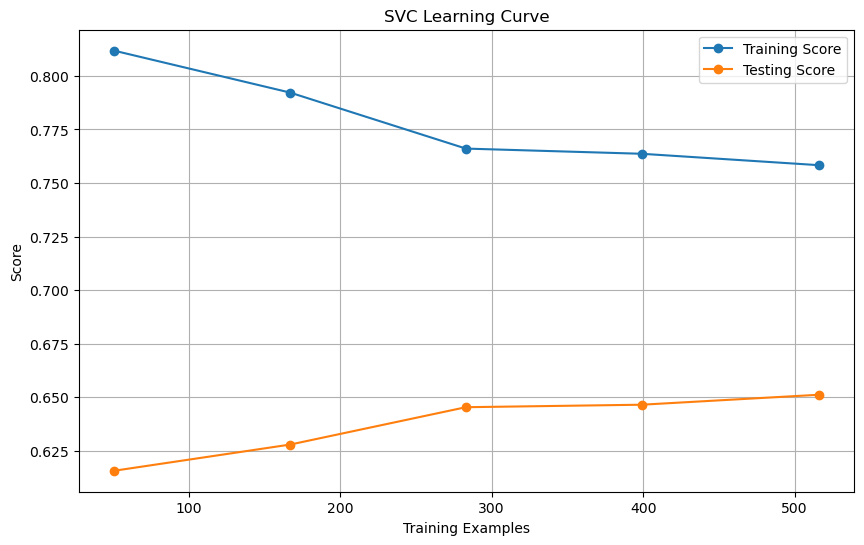

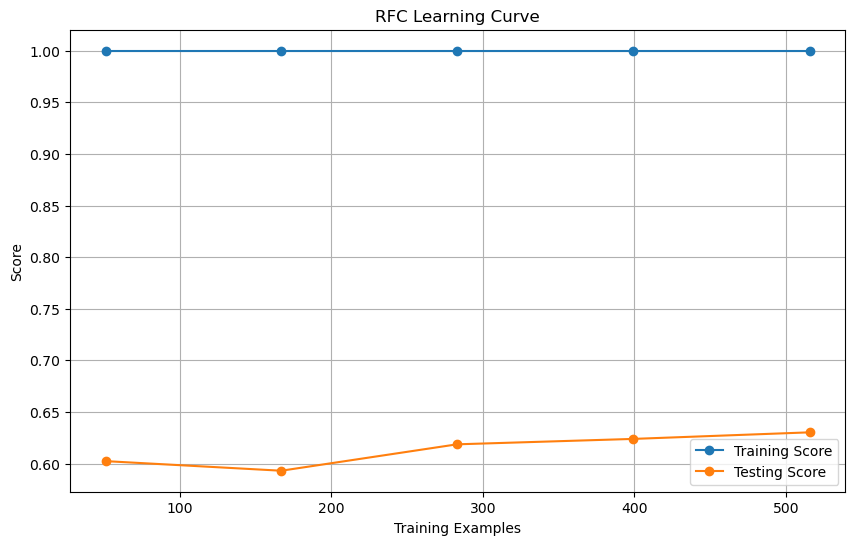

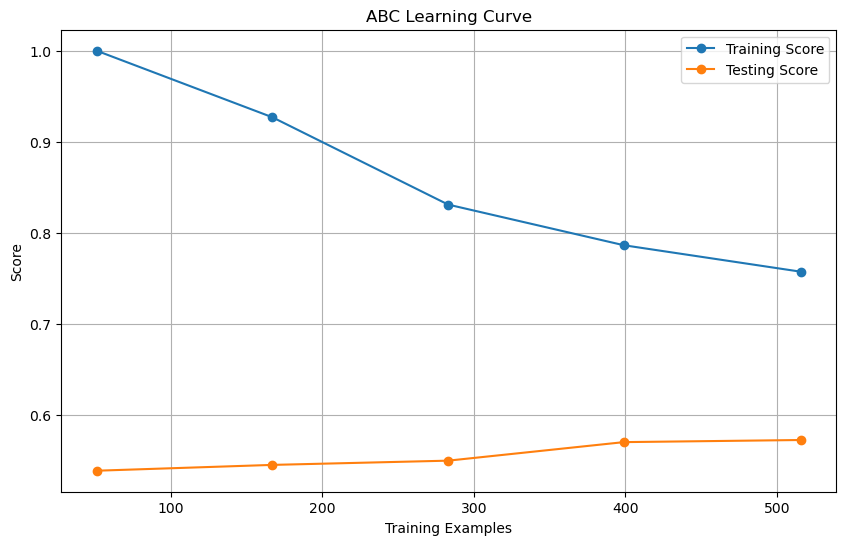

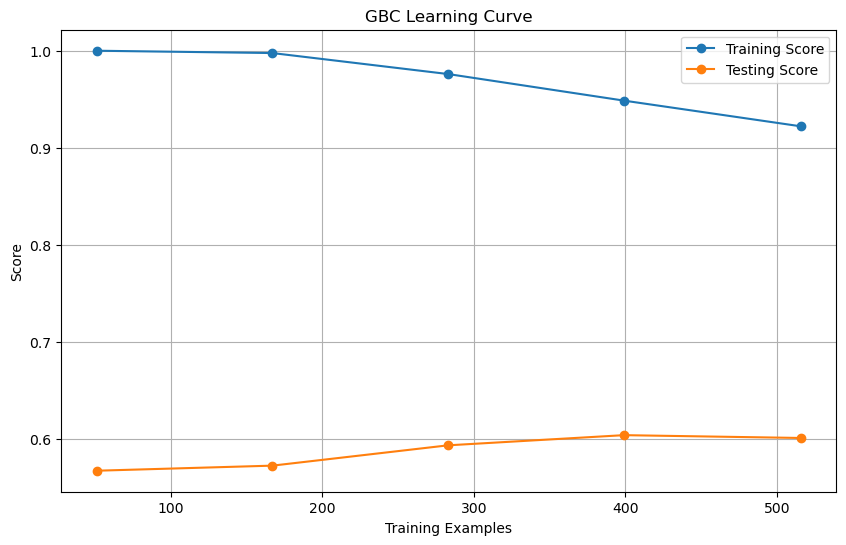

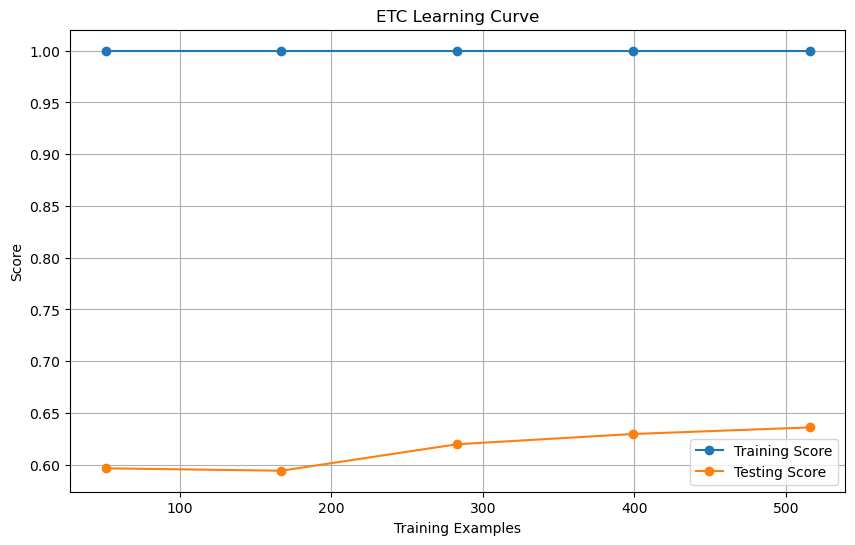

[('LR', 0.5), ('KNN', 0.62), ('NB', 0.57), ('DTC', 0.62), ('SVC', 0.67), ('RFC', 0.71), ('ABC', 0.55), ('GBC', 0.62), ('ETC', 0.75)]


In [102]:
cross_val_results = [] # Performing K-Fold Cross Validation
names = []
filterwarnings('ignore')

kf = KFold(n_splits=5, shuffle=True, random_state=42) # Do KFold to perform KFold Cross Validation

# Load in 10 classifier models for cross validation
models = [('LR', LogisticRegression(max_iter=1000)), ('KNN', KNeighborsClassifier(n_neighbors=23)), ('NB', GaussianNB()),
         ('DTC', DecisionTreeClassifier()), ('SVC', SVC()), ('RFC', RandomForestClassifier()), ('ABC', AdaBoostClassifier()),
         ('GBC', GradientBoostingClassifier()), ('ETC', ExtraTreesClassifier())]

for name, model in models: # Scoring each model and appending to cross_val_results
    score = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    score = round(score.mean(), 2)
    cross_val_results.append((name, score))
    train_sizes, train_scores, test_scores = learning_curve( # Making scores for learning curve
    model, X_val_scaled, y_val, cv=ShuffleSplit(n_splits=10, test_size=0.25, random_state=42),
                                                        scoring=make_scorer(accuracy_score)  # Use accuracy as the scorer
                                                    )
    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training Score')
    plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label='Testing Score')

    plt.title(f'{name} Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

print(cross_val_results) # Also print cross validation scores

I selected these models from what the lecturer used in previous lessons and I also searched what models are commonly used in sklearn online. Out of all these models, Support Vector, Random Forest and Extra Trees performed the best with both Extra Trees scoring the most. These 3 will be used for hyperparameter tuning. The learning curve shows the model's performance changing over training sizes. I used learning curve for each model to check if they are overfitting or underfitting.

# Hyperparameter Tuning

## Random Forest Classifier

In [103]:
RFC_tuning = RandomForestClassifier(random_state=42) # Identify the hyperparameters in RFC
print('Hyperparameters in RFC:\n', RFC_tuning.get_params())

Hyperparameters in RFC:
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [104]:
max_depth = [int(x) for x in np.arange(10, 101, 10)] # Create parameter grid to perform randomised grid search on
max_depth.append(None)
RFC_param_grid = {'n_estimators':[10,50,100,200],
                  'max_features':['auto','sqrt','log2'],
                  'max_depth':list(range(1,11))
                 }
# Perform randomised grid search
RFC_random = RandomizedSearchCV(estimator = RFC_tuning, param_distributions = RFC_param_grid, n_iter = 10, cv = kf,
                                verbose = 2, random_state = 42, n_jobs = -1)

RFC_random.fit(X_train_scaled, y_train)

RFC_best_model = RFC_random.best_estimator_ # Get the model with best parameters

y_val_pred = RFC_best_model.predict(X_val_scaled) # Predict based on validation set

val_accuracy = accuracy_score(y_val, y_val_pred) # Scoring based on overall accuracy

print(f'Best parameters for RFC: {RFC_random.best_params_}\nAccuracy on validation set: {val_accuracy:.2f}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for RFC: {'n_estimators': 200, 'max_features': 'log2', 'max_depth': 9}
Accuracy on validation set: 0.63


## Extra Trees Classifier

In [105]:
ETC_tuning = ExtraTreesClassifier(random_state = 42) # Identify the hyperparameters in ETC
print('Hyperparameters in ETC:\n', ETC_tuning.get_params())

Hyperparameters in ETC:
 {'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [106]:
max_depth = [int(x) for x in np.arange(10, 101, 10)] # Create parameter grid to perform randomised grid search on
max_depth.append(None)
ETC_param_grid = {'max_depth': max_depth,
                  'max_features': ['auto', 'sqrt'],
                  'min_samples_leaf': [int(x) for x in np.arange(1, 9, 2)],
                  'min_samples_split': [int(x) for x in np.arange(2, 13, 5)],
                  'n_estimators': [int(x) for x in np.arange(200, 2001, 200)]
                 }
# Perform randomised grid search
ETC_random = RandomizedSearchCV(estimator = ETC_tuning, param_distributions = ETC_param_grid, n_iter = 10, cv = kf,
                                verbose = 2, random_state = 42, n_jobs = -1)

ETC_random.fit(X_train_scaled, y_train)

ETC_best_model = ETC_random.best_estimator_ # Get the model with best parameters

y_val_pred = ETC_best_model.predict(X_val_scaled) # Predict based on validation set

val_accuracy = accuracy_score(y_val, y_val_pred) # Scoring based on overall accuracy

print(f'Best parameters for ETC: {ETC_random.best_params_}\nAccuracy on validation set: {val_accuracy:.2f}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for ETC: {'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100}
Accuracy on validation set: 0.66


## Support Vector Classifier 

In [107]:
SVC_tuning = SVC(random_state=42) # Identify the hyperparameters in SVC
print('Hyperparameters in SVC:\n', SVC_tuning.get_params())

Hyperparameters in SVC:
 {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [108]:
SVC_param_grid = {'C': [0.1, 1, 10], # Create parameter grid to perform randomised grid search on
                  'kernel': ['linear', 'rbf'],
                  'gamma': ['scale', 'auto', 0.1, 1],
                  'class_weight': [None, 'balanced']  
                 }
# Perform randomised grid search
SVC_random = RandomizedSearchCV(estimator = SVC_tuning, param_distributions = SVC_param_grid, n_iter = 10, cv = kf,
                                verbose = 2, random_state = 42, n_jobs = -1)

SVC_random.fit(X_train_scaled, y_train)

SVC_best_model = SVC_random.best_estimator_ # Get the model with best parameters

y_val_pred = SVC_best_model.predict(X_val_scaled) # Predict based on validation set

val_accuracy = accuracy_score(y_val, y_val_pred) # Scoring based on overall accuracy

print(f'Best parameters for SVC: {SVC_random.best_params_}\nAccuracy on validation set: {val_accuracy:.2f}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for SVC: {'kernel': 'rbf', 'gamma': 'auto', 'class_weight': 'balanced', 'C': 10}
Accuracy on validation set: 0.62


Out of all the models I've hyperparameter tuned, Extra Trees Classifier performed the highest with its accuracy score on the validation dataset being 0.66. I used RandomizedGridSearchCV instead of GridSearchCV to save computational time.

# Final Model Test and Evaluation

C:\Users\obsid\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       0.68      0.82      0.74       600
           1       0.58      0.39      0.46       383

    accuracy                           0.65       983
   macro avg       0.63      0.60      0.60       983
weighted avg       0.64      0.65      0.63       983



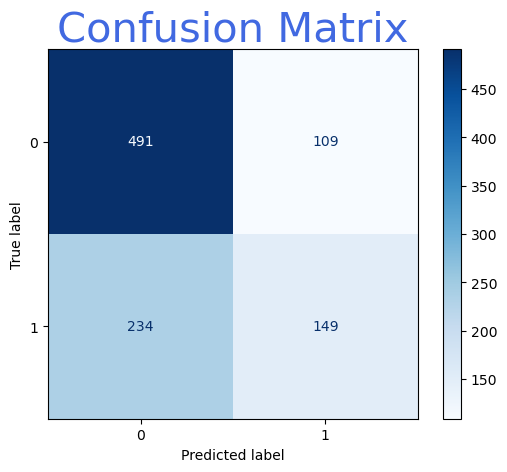

In [56]:
# Instate Extra Trees Classifier with parameters
final_ETC = ExtraTreesClassifier(n_estimators = 2000, min_samples_split = 2, min_samples_leaf = 1, max_features = 'auto', 
                                 max_depth = 100, random_state=42)

final_ETC.fit(X_train_scaled, y_train)

y_pred = final_ETC.predict(X_test_scaled) # Predict using test data

cm = confusion_matrix(y_test, y_pred) # Confusion matrix using test data

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix'
         ,fontsize = 30
         ,color = 'royalblue')

print(classification_report(y_test, y_pred)) # Print precision, recall, f1-score

Compared to the baseline model, this model has definitely learned the patterns with overall accuracy being 0.67 and every metric performing better. All in all, the overall accuracy had increased by 14%. The f1-score for class 0 had increased by 18% while f1-score for class 1 had increased by 1% The confusion matrix shows that it predicted more true negatives than false negatives while predictions for true positives are also more than false positives.

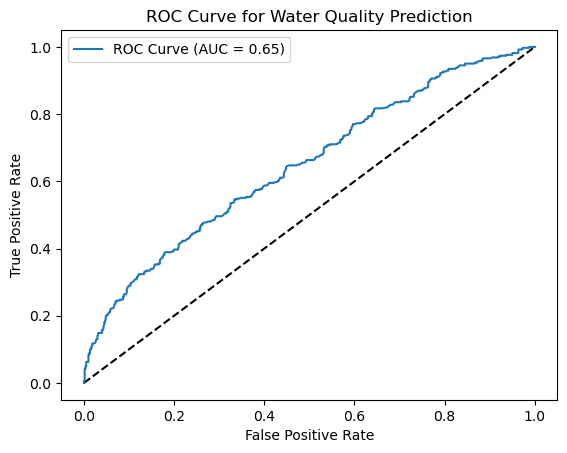

In [57]:
y_scores = final_ETC.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores) # Print the ROC curve with AUC score
roc_auc = auc(fpr,tpr)
plt.plot([0, 1], [0, 1], 'k--')
 # Plot curve using false positive rate and true positive rate and show AUC score
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Water Quality Prediction')
plt.legend()
plt.show()

Compared to the baseline ROC curve, this model discriminates the class 1 and class 0 values better, and the curve is much more to the top left which means it tries to predict more true positive values while minimising the false positive values.

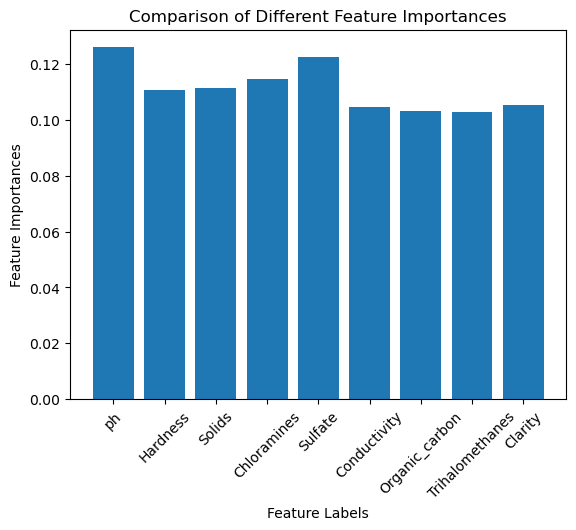

In [58]:
feature_importance = final_ETC.feature_importances_ # Gives how important is each feature to the model

plt.bar(X.columns, feature_importance) # Plot bar chart comparing feature importances
plt.xlabel('Feature Labels')
plt.xticks(rotation=45)
plt.ylabel('Feature Importances')
plt.title('Comparison of Different Feature Importances')
plt.show()

Extra Trees Classifier offers a way to see how importance of each feature, which I've visualised. It seems that ph plays the most importance while Trihalomethanes plays the least.